# Taking a picture, classification and display

In [18]:
import numpy as np
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential, Model
from keras.layers import Dropout, Flatten, Dense, Input
from keras import backend as K
from keras.preprocessing import image
K.set_image_dim_ordering('th')
import os
import time
import matplotlib.pyplot as plt

from IPython.display import Image, display, clear_output
import datetime

import cv2

### Change paths below

In [ ]:
os.chdir("/home/dwx/Documents/Studium/DTU/11/DL Deep Learning/project/ISIC_MSK-2_1_sorted")
weights_path = "weights/4_10_110.h5"

In [6]:
# path to the model weights files.
# dimensions of our images.
img_width, img_height = 150, 150

train_data_dir = 'train'
validation_data_dir = 'validation'
test_dir = 'test'
files_benign=os.listdir(test_dir+"/Benign/")
files_malignant=os.listdir(test_dir+"/Malignant/")

input_tensor = Input(shape=(3,img_width,img_height))
base_model = applications.VGG16(weights='imagenet',include_top= False,input_tensor=input_tensor)
top_model = Sequential()
top_model.add(Flatten(input_shape=base_model.output_shape[1:]))
top_model.add(Dense(256, activation='relu'))
top_model.add(Dropout(0.5))
top_model.add(Dense(1, activation='sigmoid'))
model = Model(inputs= base_model.input, outputs= top_model(base_model.output))

model.load_weights(weights_path)

def predict_image_class(file):
    x = image.load_img(file, target_size=(img_width,img_height))
    x = image.img_to_array(x)
    x = np.expand_dims(x, axis=0)
    print(x.shape)
    class_predicted = model.predict(x)
    print(class_predicted)
    if class_predicted==1:
        print("malign")
    else:
        print("benign") 
    return

def TakePictureAndSave(filename="test.png"):
    camera_port = 0
    camera = cv2.VideoCapture(camera_port)
    time.sleep(0.3)  # If you don't wait, the image will be dark
    return_value, image = camera.read()
    cv2.imwrite("test.png", image)
    del(camera)  # so that others can use the camera as soon as possible
    return

/home/dwx/anaconda3/lib/python3.5/site-packages/keras/applications/vgg16.py:182: UserWarning: You are using the TensorFlow backend, yet you are using the Theano image data format convention (`image_data_format="channels_first"`). For best performance, set `image_data_format="channels_last"` in your Keras config at ~/.keras/keras.json.
  warnings.warn('You are using the TensorFlow backend, yet you '


### Example: taking a picture

In [14]:
filename = "test.png"
TakePictureAndSave(filename)

### Example: classification and display of an image (self taken).

(1, 3, 150, 150)
[[ 0.]]
benign


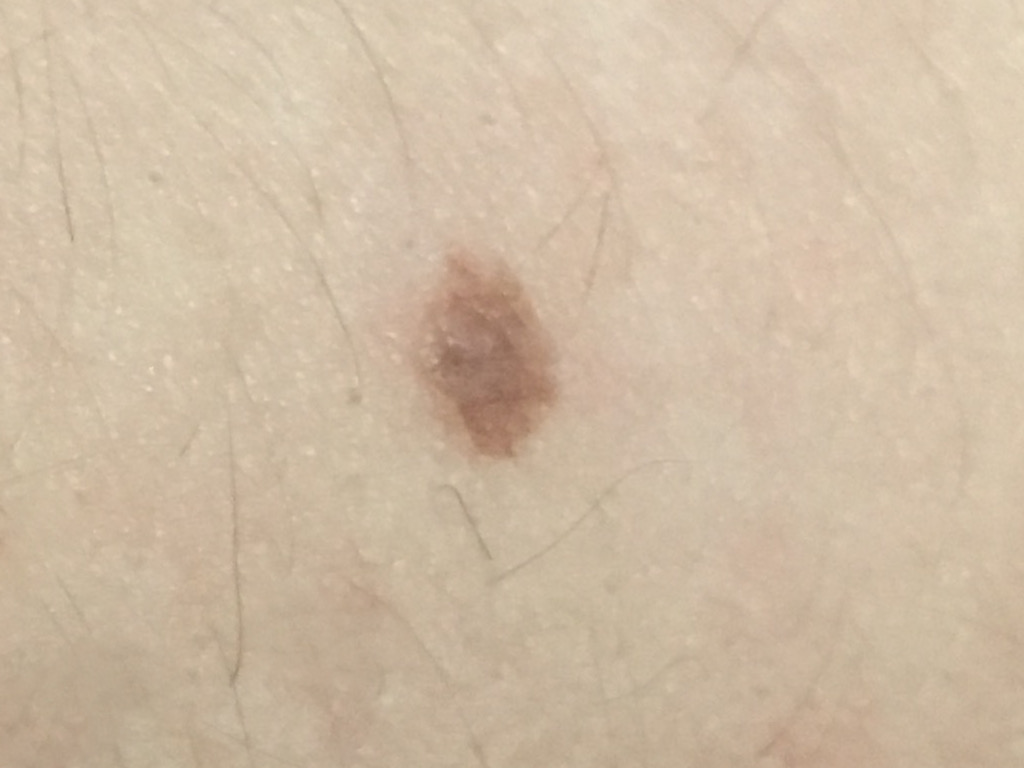

In [22]:
filename = "IMG_0845c1.JPG"
predict_image_class(filename)
display(Image(filename))

In [ ]:
#print(test_dir + "/Benign/" + files_benign[0])
#predict_image_class(test_dir + "/Benign/" + files_benign[0])
#predict_image_class("validation/Benign/ISIC_0009874.jpg")